#                   Super Store Time Series Analysis!

### Business Problem Statement
* This project aims at building models to understand the buying pattern of customers and predicting the future pattern,
to make decisions for profit maximization.

    
    
* **Keywords:** ARIMA, SARIMA, SARIMAX, Time series, model
	

### Dataset
* URL:https://community.tableau.com/docs/DOC-1236.
* Short Descripition:The original dataset has 21 columns and 10000 rows. 
* The columns are: Row ID, Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, Country, City, Postal Code, Region, Product ID, Category, Sub-Category, Product Name, Sales, Quantity, Discount, Profit.
* Keywords: Order Date, Order Amount, Category*


### Explanation and Justification in Machine Learning
 * ARIMA
    * An autoregressive integrated moving average, or ARIMA, is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends. 
 
 * SARIMA
    * The SARIMA model is an extension of the ARIMA model, typically used in cases where we suspect a seasonal pattern in our data.
     
 * SARIMAX
    * The SARIMAX model is an extension of the SARIMA model, typically used in cases where we include external factors along with sesonality.

    
 
* **Keywords:** time series analysis,stationary, seasonality, trend, prediction

	
	


### Major Results
1. result 1 
    - ARIMA model giving that (1,1,1) as the best values for (p, d, q) and making predictions using that.
2. result 2
    - Considering seasonality (SARIMA model) getting (1,1,0,12) as the best values for (p,d,q,m) SARIMA and forecasting using those values.
3. result 3
    - Considering external variables along with seasonality (SARIMAx model) getting (1,1,1)*(1,1,0,12) as the best value for(p,d,q) *(P,d,Q,m) and making predicitons using that.
   

In [30]:
import types

def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

excludes = ['builtins', 'types', 'sys']

imported_modules = [module for module in imports() if module not in excludes]

clean_modules = []

for module in imported_modules:

    sep = '.'  # to handle 'matplotlib.pyplot' cases
    rest = module.split(sep, 1)[0]
    clean_modules.append(rest)

changed_imported_modules = list(set(clean_modules))  # drop duplicates

pip_modules = !pip freeze  # you could also use `!conda list` with anaconda

for module in pip_modules:
    name, version = module.split('==')
    if name in changed_imported_modules:
        print(name + '\t' + version)

matplotlib	3.1.1
pandas	0.25.1
pmdarima	1.5.1
statsmodels	0.10.1


In [2]:
#Importing all the required Packages
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Reading the input data file into DataFrame
df = pd.read_excel("Siva Yogitha Mokkapati- Venkat Nihaal Akula-dataset.xls")
#Separating the data belonigng to furniture category
furniture = df.loc[df['Category'] == 'Furniture']
furniture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 9990
Data columns (total 21 columns):
Row ID           2121 non-null int64
Order ID         2121 non-null object
Order Date       2121 non-null datetime64[ns]
Ship Date        2121 non-null datetime64[ns]
Ship Mode        2121 non-null object
Customer ID      2121 non-null object
Customer Name    2121 non-null object
Segment          2121 non-null object
Country          2121 non-null object
City             2121 non-null object
State            2121 non-null object
Postal Code      2121 non-null int64
Region           2121 non-null object
Product ID       2121 non-null object
Category         2121 non-null object
Sub-Category     2121 non-null object
Product Name     2121 non-null object
Sales            2121 non-null float64
Quantity         2121 non-null int64
Discount         2121 non-null float64
Profit           2121 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 364.5

In [4]:
#Dropping the columns other than sales and order date of the furniture
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 
        'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
#Sorting the data set based on Order date to obtain time series
furniture = furniture.sort_values('Order Date')
#Checking for the null values
furniture.isnull().sum()
#We could see no null values are present in the data

Order Date    0
Sales         0
dtype: int64

In [5]:
#Grouping the data based on order date so as to obtain the data for all the same dates one after the other 
furniture = furniture.groupby('Order Date')
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


In [6]:
#Adding the sales values of same dates together and resetting the index for the resultant table
furniture=furniture['Sales'].sum().reset_index()

In [7]:
#Since time series required to be indexed with respect to datastamp, setting order date as the index for the DataFrame
furniture=furniture.set_index('Order Date')

In [8]:
#Checking the index of the dataframe
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [9]:
#Resampling the sales date by taking the mean of all the sales for a particular month 
#and assigning the values to first date of the month
y = furniture['Sales'].resample('MS').mean()


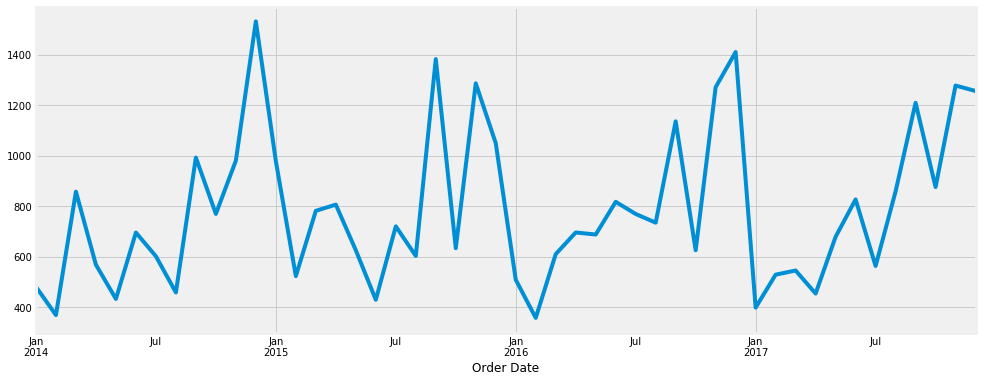

In [10]:
#Plotting the time series plot
y.plot(figsize=(15, 6))
plt.show()

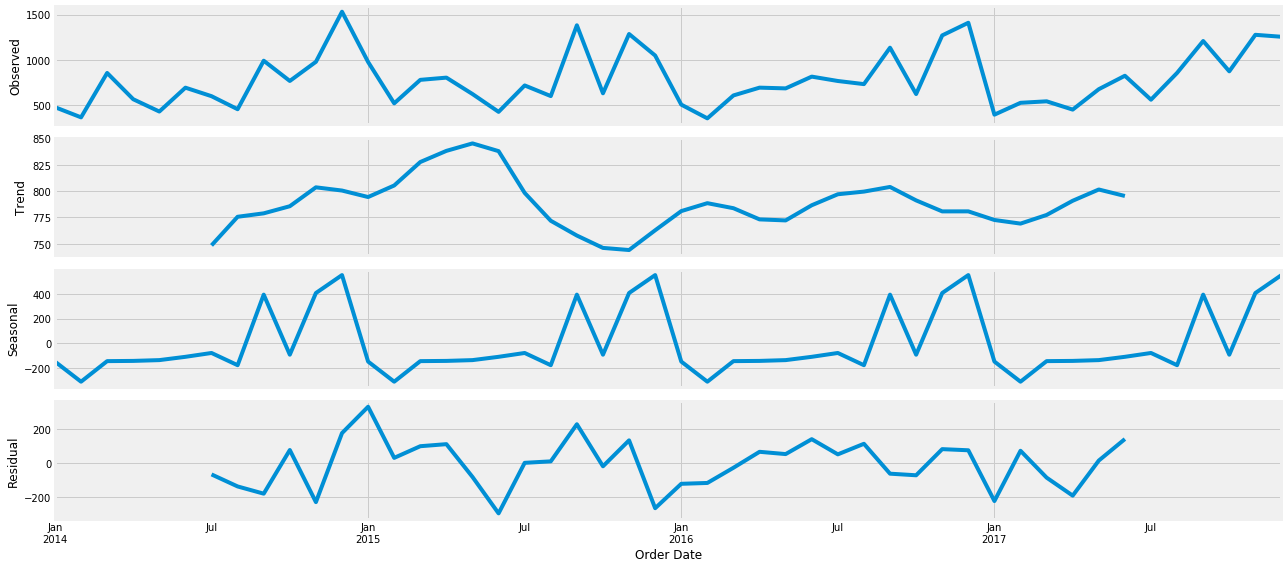

In [11]:
#Decomposing the above obtained time series into its subcomponents namely (Observed,Trend,Seasonal,Residual)
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()
#Observed - Plot shows the original time series plot
#Trend  - Plot shows how the data varies over period of time 
#Below Trend graph we can observe there is no fixed trend pattern
#Seasonal - Plot shows how the data varies seasonally
#Below Seasonal plot shows that there is increase of sales every year end and it falls back at the start of the year
#Residual - Plot shows any left over abnormalities after seperating Trend and Seasonal patterns from original data
#Below Residual plot shows there exists abnormalities but no defined pattern can be observed

In [12]:
#Steps For Developing an ARIMA Model.
#After observing the decomposed components of the Original Series, Next step is to built ARIMA(p,d,q) model.
#First we start by finding 'd' i.e. differentiating term for our model.
#'d' can be calculated by finding number of differentiations required for time series to ecome stationary
#Then we find 'p' value i.e. measure of AutoRegression (AR) terms in the series
#This value can be found by finding number of terms in PACF graph after which the series reaches below significant level
#Then we find 'q' value i.e. measure of MoivngAverages (MA) terms in the series
#This value can be found by finding number of terms in ACF graph after which the series reaches below significant level

**Finding 'd' values for ARIMA model**

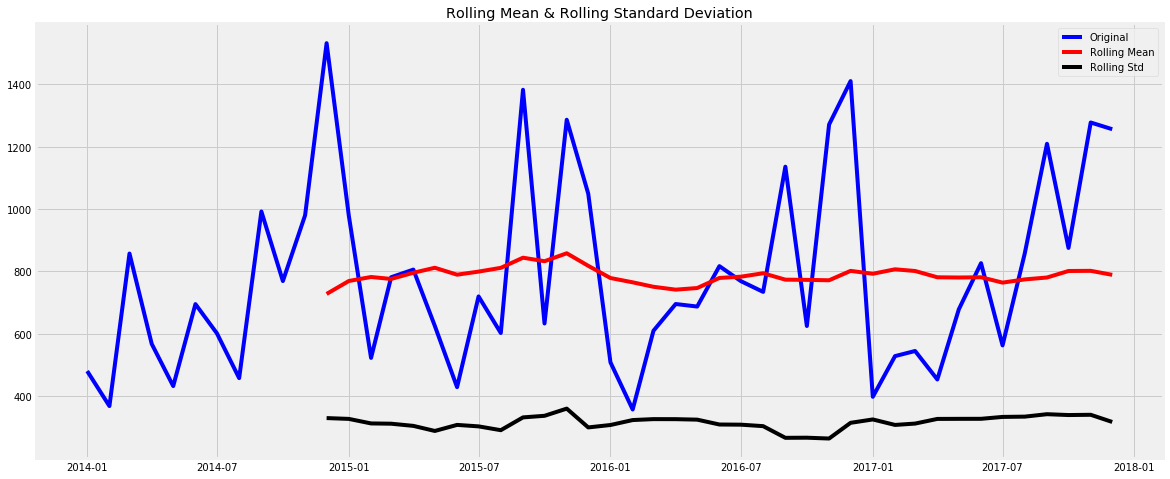

In [13]:
#Plotting Rolling mean and Rolling Standard deviation of our original series
rolling_mean= y.rolling(window=12).mean()
rolling_std= y.rolling(window=12).std()
plt.plot(y, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()
#From the below graph we can see that rolling mean and rolling standard deviation is almost a straight line.
#We can assume that the time series happens to be stationary by default without any differentiation required
#We can take 'd' values as 0 or for further checking we can even take '1', thus d lies in [0,2]

In [14]:
#Augmented Dickey–Fuller test
#Another approach for finding the differentiation term is Augmented Dickey–Fuller test.
#This test takes Null Hypothesis as the series to be not stationary
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#From the p-value obtained we can reject the null hypothesis.
#Further we can state that we have enough evidence to claim that Series is stationary.
#Thus we take 'd' value to be 0 or 1 for better performance.

ADF Statistic: -5.191070
p-value: 0.000009


**Finding p-value**

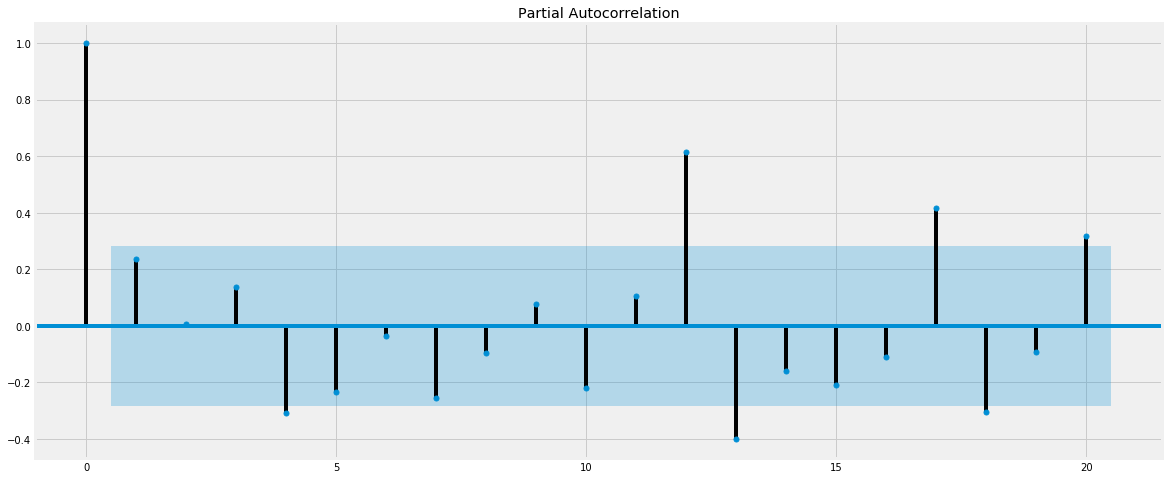

In [15]:

from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_pacf(y,lags=20)
plt.show()

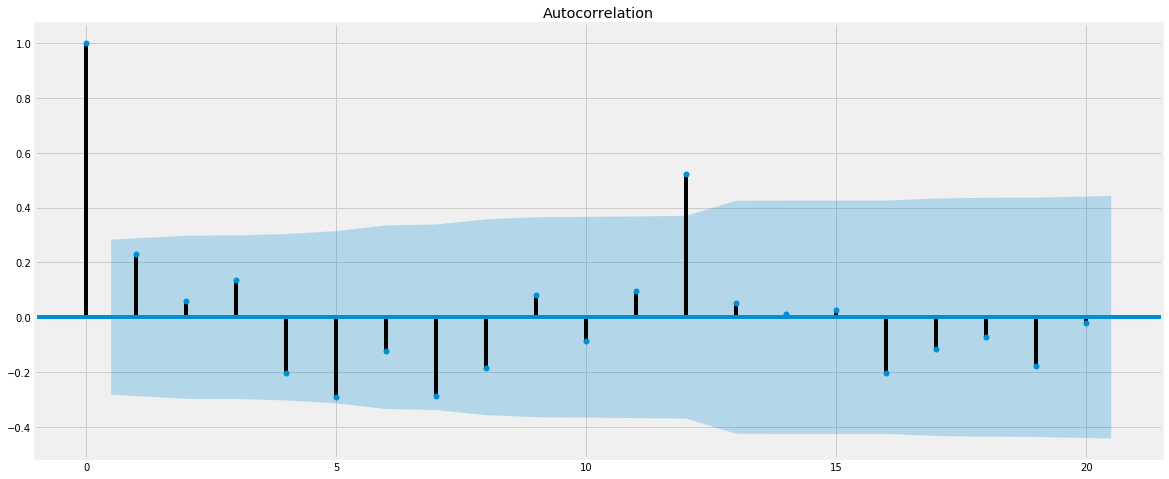

In [16]:
plot_acf(y,lags=20)
plt.show()

In [17]:
!pip install pmdarima
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
modelN = pm.auto_arima(y, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=1, max_q=1, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(modelN.summary())

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=693.576, BIC=697.276, Fit time=0.084 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=686.724, BIC=692.274, Fit time=0.018 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=678.954, BIC=684.504, Fit time=0.122 seconds
Near non-invertible roots for order (0, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 0); AIC=691.669, BIC=693.519, Fit time=0.012 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 0); AIC=678.362, BIC=685.763, Fit time=0.117 seconds
Near non-invertible roots for order (1, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Total fit time: 0.375 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observ

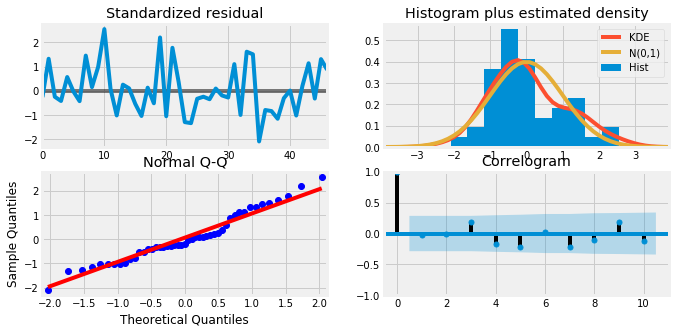

In [18]:
modelN.plot_diagnostics(figsize=(10,5))
plt.show()

In [19]:
#pip install pmdarima --user

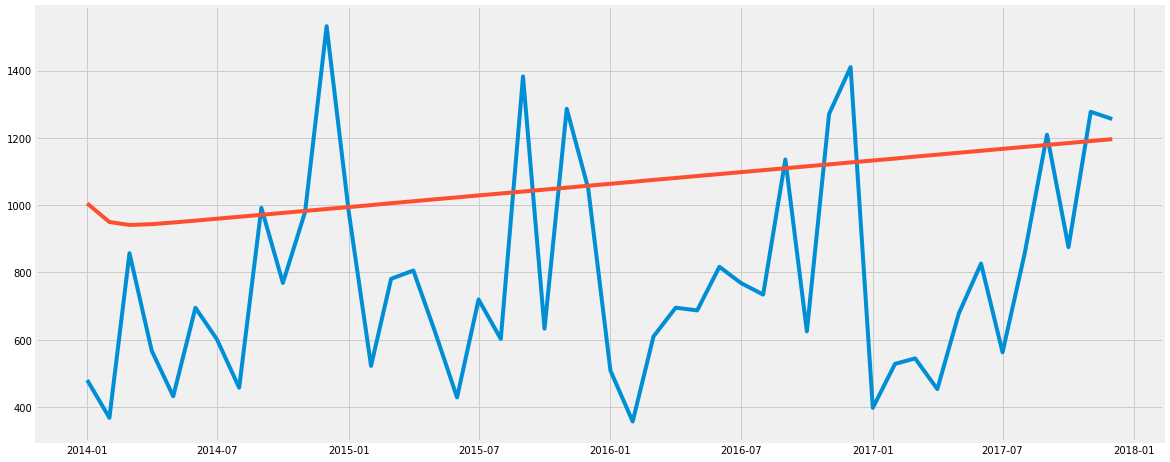

In [20]:
forecast=modelN.predict(n_periods=len(y))
forecast = pd.DataFrame(forecast,index = y.index,columns=['Prediction'])
forecast
plt.plot(y)
plt.plot(forecast)
plt.show()

In [21]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
models =pm.auto_arima(y, start_p=1, start_q=0,
                     max_p=1, max_q=1, m=12,
                         start_P=0,max_P=1,start_Q=1, seasonal=True,
                         d=0,D=1,trace=True,
                         error_action='ignore',  
                         suppress_warnings=True,
                         stepwise=True)

print(models.summary())

Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=497.083, BIC=500.250, Fit time=0.007 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=494.685, BIC=501.019, Fit time=0.341 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=495.371, BIC=496.954, Fit time=0.016 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=498.718, BIC=503.469, Fit time=0.126 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=492.740, BIC=497.490, Fit time=0.156 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=na

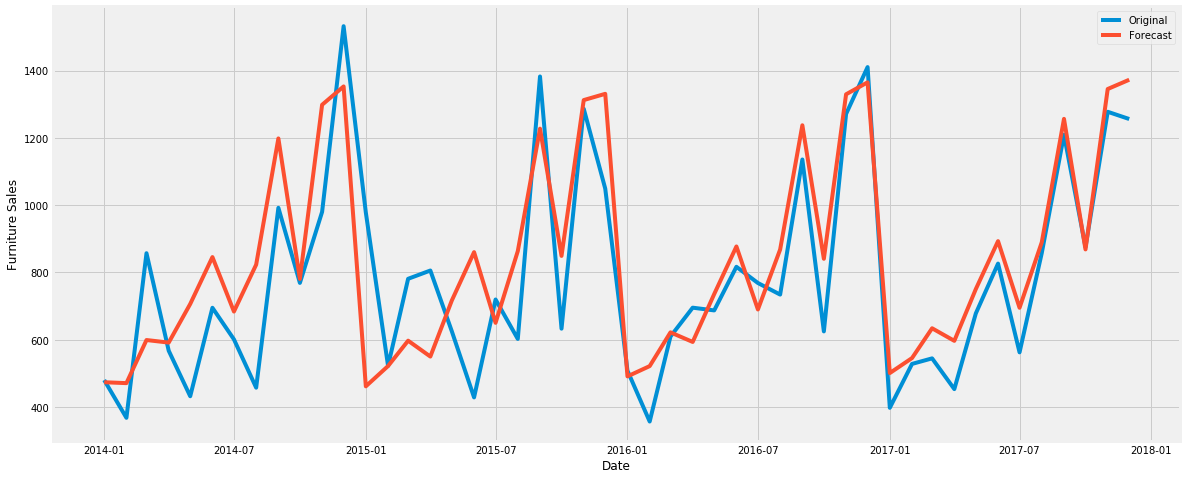

In [22]:
forecast=models.predict(n_periods=len(y))
forecast = pd.DataFrame(forecast,index = y.index,columns=['Prediction'])
forecast
plt.plot(y,label='Original')
plt.plot(forecast,label='Forecast')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

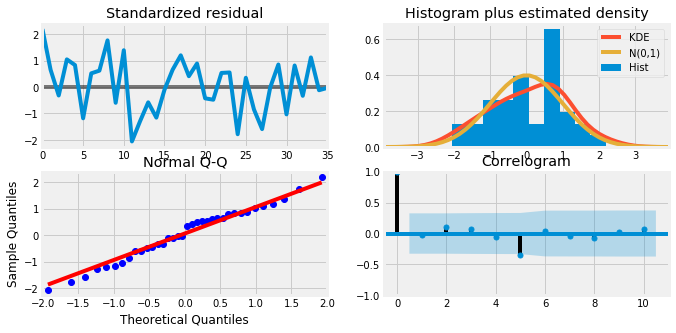

In [23]:
models.plot_diagnostics(figsize=(10,5))
plt.show()

In [24]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [25]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1446.5593227130305
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:477.7170130920218
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1172.208674145885
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:466.56074298091255
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:499.574045803366
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:319.98848769468657
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1250.2320272227237
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1550.2003231687213
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:319.7714068109211
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:649.

In [26]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 12)   Log Likelihood                -144.894
Date:                            Thu, 12 Dec 2019   AIC                            297.788
Time:                                    00:06:32   BIC                            302.152
Sample:                                01-01-2014   HQIC                           298.816
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360   

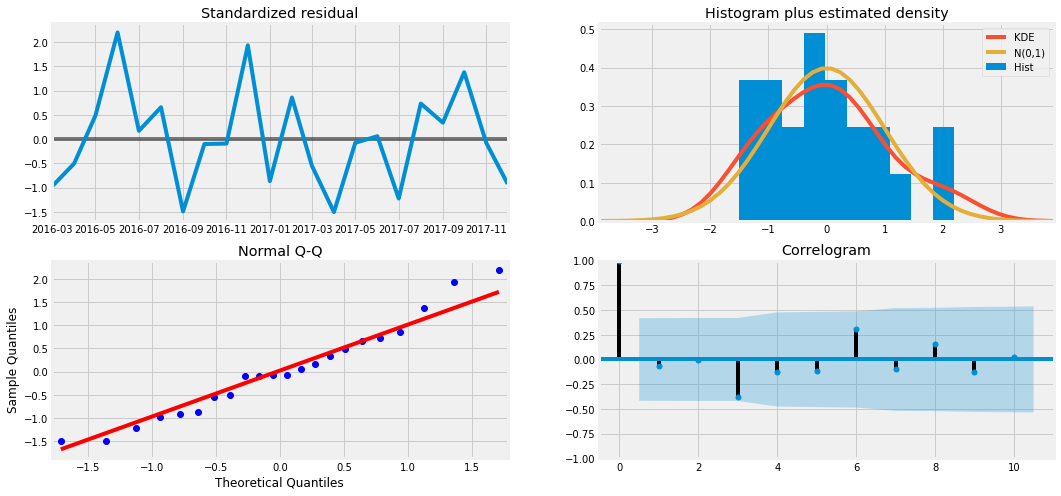

In [27]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

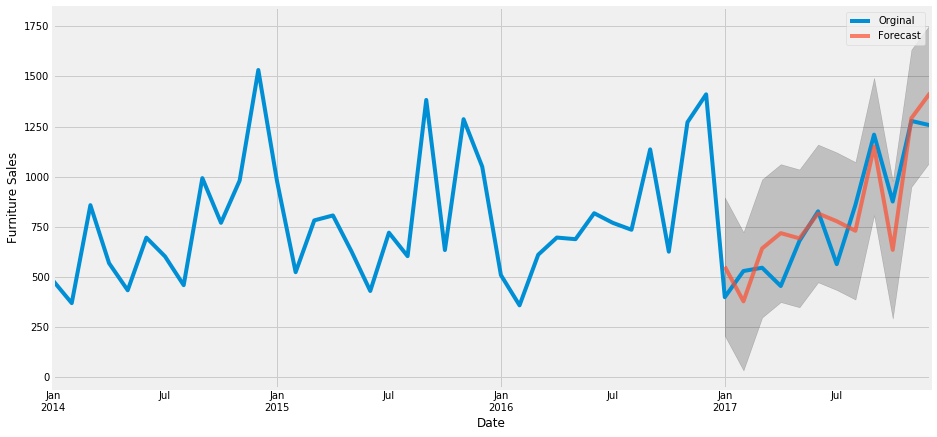

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='Orginal')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

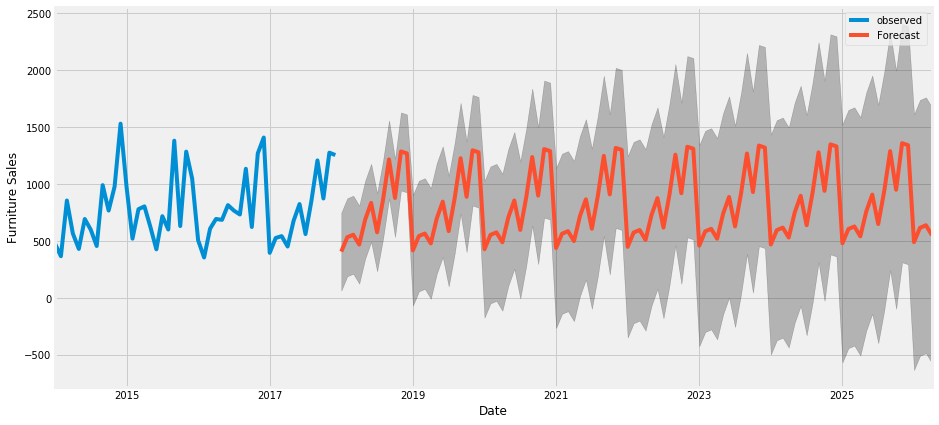

In [29]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

### Issues / Improvements
1. Dataset is small. Has data only for 3 years.
2. Use cross-validaiton

###  References
   - Academic: Pdfs posted in Canvas
   - Online: https://medium.com/towards-artificial-intelligence/an-introduction-to-time-series-analysis-using-python-and-pandas-222fe72b191a
	